In [1]:
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=482b9b55f1b97c55e1ab9630917e2c86a732cb2fbf95ce4c7ff110b5568d47b5
  Stored in directory: c:\users\33313\appdata\local\pip\cache\wheels\c4\1a\79\20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [4]:
dataset = pd.read_csv('./Market_Basket_Optimisation.csv', header = None)
dataset.shape

(7501, 20)

In [7]:
# csv裡面的所有資料轉成二維array
transactions = dataset.to_numpy().astype(str).tolist()
# .to_numpy() 轉成 NumPy 陣列。
# astype(str) 將所有元素轉換為字串。
# .tolist() 將 NumPy 陣列轉成 Python 的二維清單。
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

## Training the Apriori model

In [10]:
from apyori import apriori
rules = apriori(
    transactions = transactions, 
    min_support = 0.003, # 出現次數需為 7501 × 0.003 ≈ 23。
    min_confidence = 0.2, # 置信度必須至少為 20%
    min_lift = 3, # 設定最小提升度門檻，A 和 B 之間的相關性至少是獨立情況的 3 倍。
    # 規則中項目集的最大/小長度
    min_length = 2, 
    max_length = 2
    )

In [11]:
results = list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 將結果轉為 DataFrame
rules_data = []
for rule in results:
    for ordered_stat in rule.ordered_statistics:
        rules_data.append([
            ', '.join(rule.items),
            ', '.join(ordered_stat.items_base),
            ', '.join(ordered_stat.items_add),
            rule.support,
            ordered_stat.confidence,
            ordered_stat.lift
        ])

columns = ['Rule', 'Base', 'Add', 'Support', 'Confidence', 'Lift']
rules_df = pd.DataFrame(rules_data, columns=columns)

rules_df.head()

,Rule,Base,Add,Support,Confidence,Lift
0,"light cream, chicken",light cream,chicken,0.004533,0.290598,4.843951
1,"mushroom cream sauce, escalope",mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,"pasta, escalope",pasta,escalope,0.005866,0.372881,4.700812
3,"honey, fromage blanc",fromage blanc,honey,0.003333,0.245098,5.164271
4,"ground beef, herb & pepper",herb & pepper,ground beef,0.015998,0.323450,3.291994


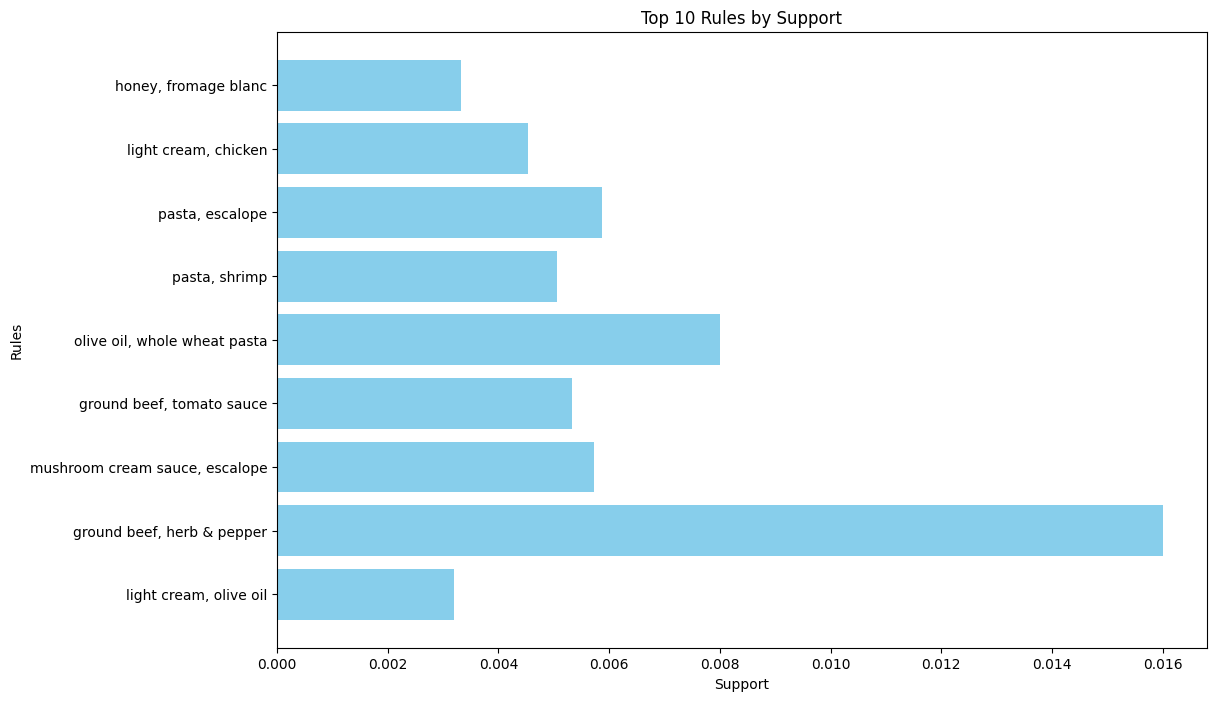

In [15]:
# 選擇支持度最高的規則
top_rules = rules_df.nlargest(10, 'Support')

# 創建條形圖
plt.figure(figsize=(12, 8))
plt.barh(top_rules['Rule'], top_rules['Support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Rules')
plt.title('Top 10 Rules by Support')
plt.gca().invert_yaxis()  # 反轉 Y 軸以便最重要的規則位於上方
plt.show()

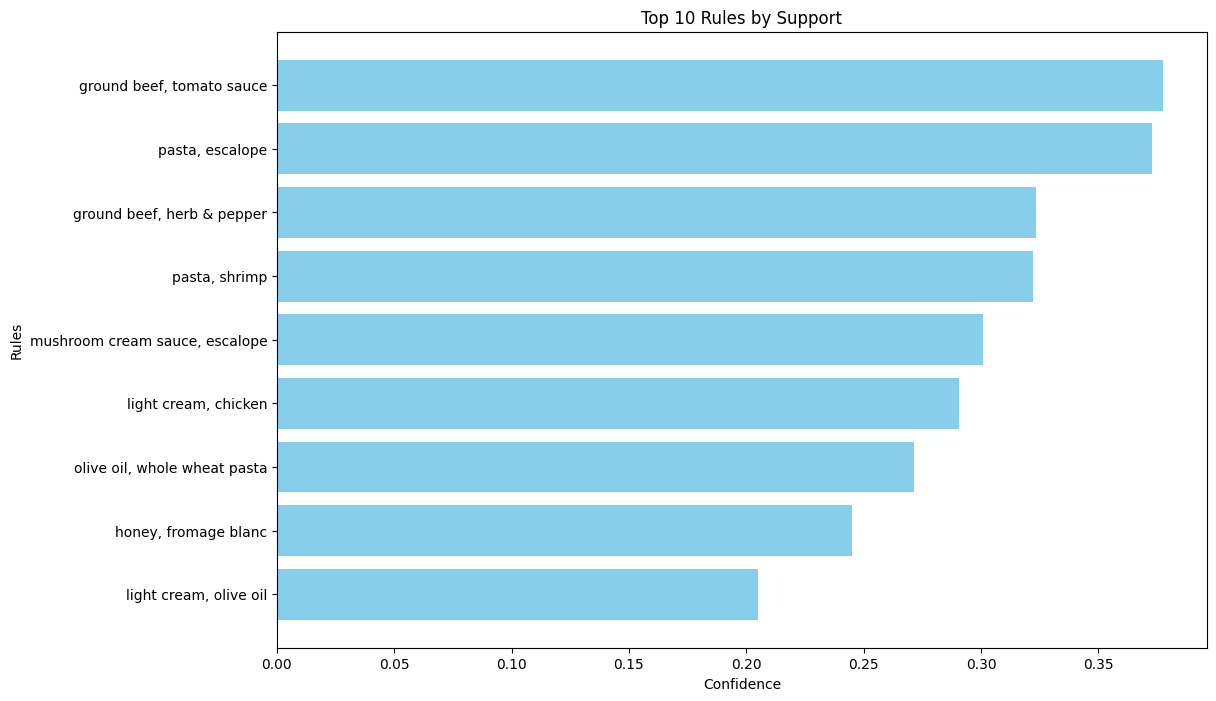

In [17]:
# 選擇一置信最高的規則
top_rules = rules_df.nlargest(10, 'Confidence')

# 創建條形圖
plt.figure(figsize=(12, 8))
plt.barh(top_rules['Rule'], top_rules['Confidence'], color='skyblue')
plt.xlabel('Confidence')
plt.ylabel('Rules')
plt.title('Top 10 Rules by Support')
plt.gca().invert_yaxis()  # 反轉 Y 軸以便最重要的規則位於上方
plt.show()

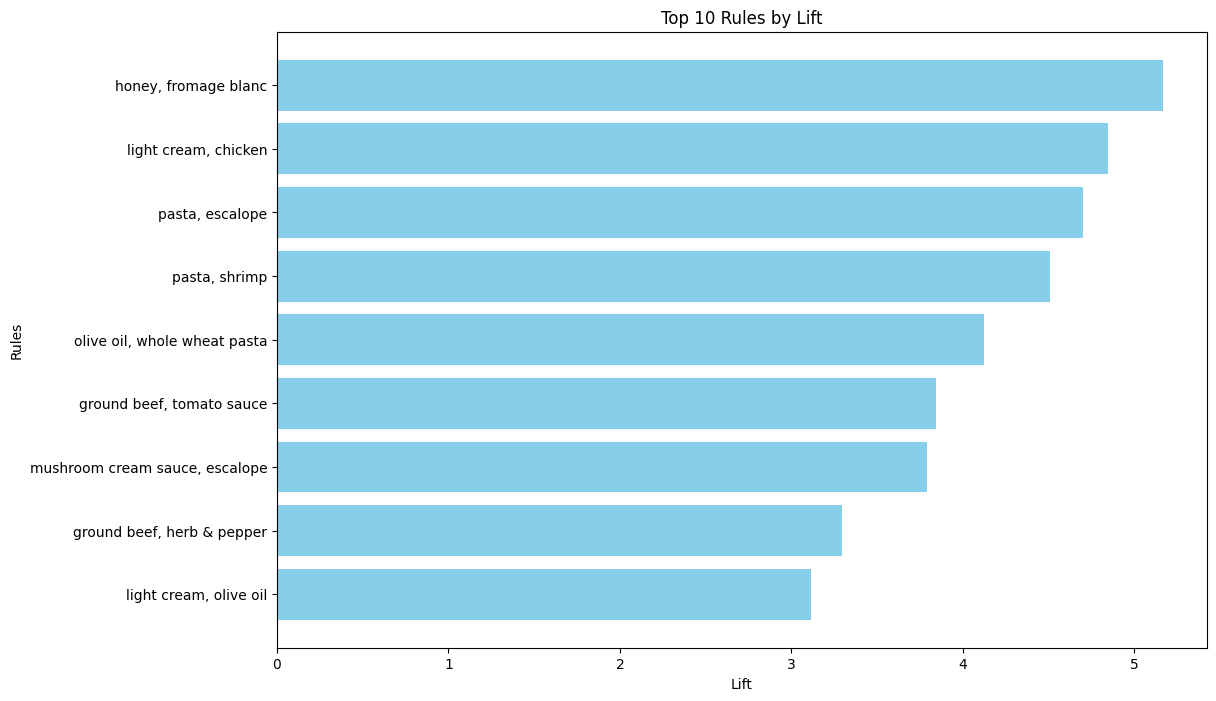

In [18]:
# 選擇提升度最高的規則
top_rules = rules_df.nlargest(10, 'Lift')

# 創建條形圖
plt.figure(figsize=(12, 8))
plt.barh(top_rules['Rule'], top_rules['Lift'], color='skyblue')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.title('Top 10 Rules by Lift')
plt.gca().invert_yaxis()  # 反轉 Y 軸以便最重要的規則位於上方
plt.show()